# 1a. Paper Summary
### The paper is a well-structured one where the author wants to explore the default prediction in P2P lending space. It follows an intor, literature review, hypothesis development, empirical study, and conclusions. I lack a structural way of putting together a project, and this framework would serve as an epitome for my next big project. Although there are many variables being used in this study, one surprising fact was that lending for small business is more risky than lending for wedding purpose. Generally, Lending Club Loan-Grade-Assignment is accurate in predicting the probability of default. I find this reading more interesting than the credit card default one. 

# 1b. EDA

In [409]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%autosave 180

Autosaving every 180 seconds


In [410]:
os.chdir("/Users/aston/Desktop/CU2020Summer/M2/HW2/")

In [411]:
data = pd.read_csv('XYZloan_default_selected_vars.csv')

In [412]:
data.shape

(80000, 89)

In [413]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


In [414]:
print(data.columns.values)

['Unnamed: 0' 'Unnamed: 0.1' 'id' 'loan_default' 'AP001' 'AP002' 'AP003'
 'AP004' 'AP005' 'AP006' 'AP007' 'AP008' 'AP009' 'TD001' 'TD002' 'TD005'
 'TD006' 'TD009' 'TD010' 'TD013' 'TD014' 'TD015' 'TD022' 'TD023' 'TD024'
 'TD025' 'TD026' 'TD027' 'TD028' 'TD029' 'TD044' 'TD048' 'TD051' 'TD054'
 'TD055' 'TD061' 'TD062' 'CR004' 'CR005' 'CR009' 'CR012' 'CR015' 'CR017'
 'CR018' 'CR019' 'PA022' 'PA023' 'PA028' 'PA029' 'PA030' 'PA031' 'CD008'
 'CD018' 'CD071' 'CD072' 'CD088' 'CD100' 'CD101' 'CD106' 'CD107' 'CD108'
 'CD113' 'CD114' 'CD115' 'CD117' 'CD118' 'CD120' 'CD121' 'CD123' 'CD130'
 'CD131' 'CD132' 'CD133' 'CD135' 'CD136' 'CD137' 'CD152' 'CD153' 'CD160'
 'CD162' 'CD164' 'CD166' 'CD167' 'CD169' 'CD170' 'CD172' 'CD173' 'MB005'
 'MB007']


In [415]:
# the number of unique values for each variable
data.nunique(axis=0)

Unnamed: 0      80000
Unnamed: 0.1    80000
id              80000
loan_default        2
AP001              37
                ...  
CD170            8046
CD172           10818
CD173           10198
MB005              29
MB007             112
Length: 89, dtype: int64

In [416]:
# suppresses the scientific notation, so display normal numbers
# two apply functions because unsupported format string
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.301300,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.334430,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.336550,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.713840,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.000000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.000000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.000000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.000000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.000000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.000000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.000000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.000000,125352.000000,87312.000000,47.000000


In [417]:
# count the non-na cells, apparently we need to take out some Nans
#Null values is a big problem for some variables, I need to do something about it
data.isnull().sum().sort_values(ascending=False)

TD048         79999
TD055         79999
TD062         79999
TD044         79997
TD051         79995
              ...  
CR012             0
CR015             0
CR017             0
CR018             0
Unnamed: 0        0
Length: 89, dtype: int64

In [418]:
# find the count and turn it into a df for graphing
nullchartdata = data.isnull().sum()
nullchartdata = pd.DataFrame(
    {'Variable':nullchartdata.index,'Count':nullchartdata.values})
nullchartdata.head()

,Variable,Count
0,Unnamed: 0,0
1,Unnamed: 0.1,0
2,id,0
3,loan_default,0
4,AP001,0


In [419]:
nullchartdata[nullchartdata['Count']>400].shape

(16, 2)

Text(0.5, 0.98, 'Null values for each Column')

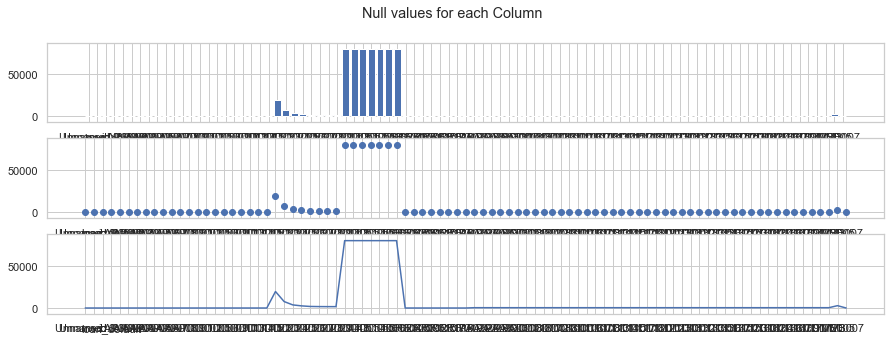

In [420]:
# graph the variables by the number of null values
names = nullchartdata['Variable']
values = nullchartdata['Count']
fig, axs = plt.subplots(3, 1, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Null values for each Column')

In [421]:
#extract from the dataframe into conditional (count>400) pd.series, into list, then drop, now there are 73 variables
uselessvar = nullchartdata[nullchartdata['Count']>400]["Variable"]
uselessvar = uselessvar.values
uselessvar.tolist()
data = data.drop(uselessvar.tolist(), axis=1)
data.shape

(80000, 73)

Text(0.5, 0.98, 'Null values for each Column')

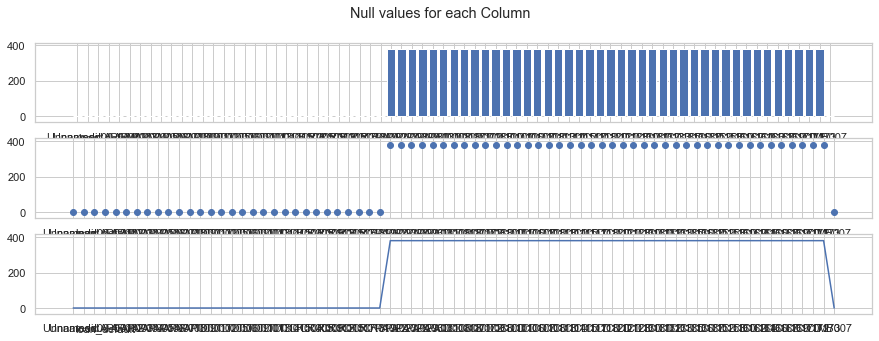

In [422]:
# rerun the above null data visualization
nullchartdata = data.isnull().sum()
nullchartdata
nullchartdata = pd.DataFrame(
    {'Variable':nullchartdata.index,'Count':nullchartdata.values})
nullchartdata.head()
names = nullchartdata['Variable']
values = nullchartdata['Count']
fig, axs = plt.subplots(3, 1, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Null values for each Column')

In [423]:
#keep in mind the shape of the current dataset
data.shape

(80000, 73)

In [424]:
#drop the rows that are null
data = data.dropna(how='any',axis=0) 
data.shape

(79619, 73)

Text(0.5, 0.98, 'Null values for each Column')

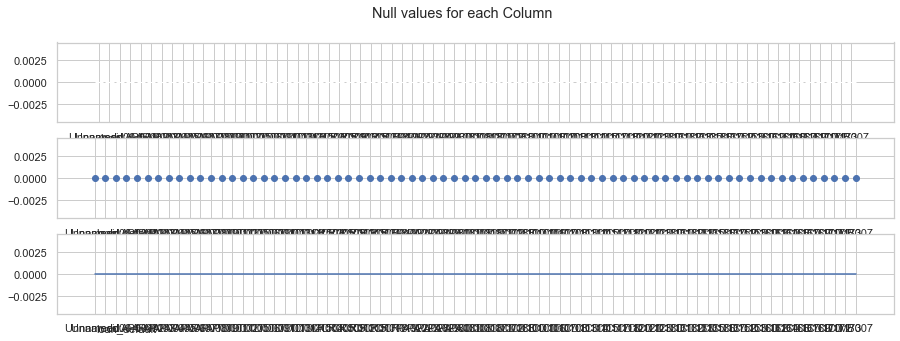

In [425]:
# rerun the above null data visualization
nullchartdata = data.isnull().sum()
nullchartdata
nullchartdata = pd.DataFrame(
    {'Variable':nullchartdata.index,'Count':nullchartdata.values})
nullchartdata.head()
names = nullchartdata['Variable']
values = nullchartdata['Count']
fig, axs = plt.subplots(3, 1, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Null values for each Column')

In [426]:
data.iloc[0:3, :].head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,WEB


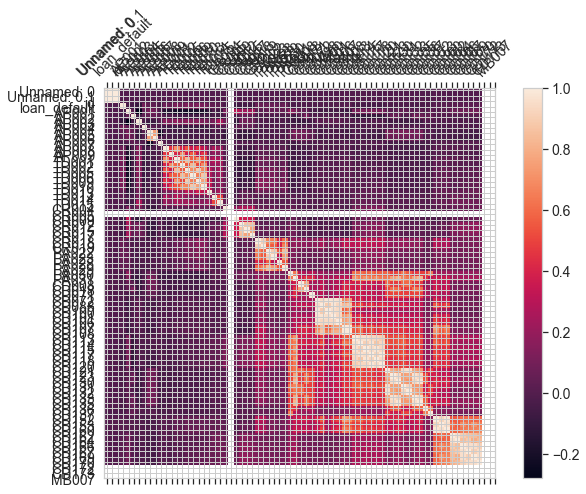

In [427]:
# it seems like the remaining variables are more correlated to nearby variables 
# if they are in the bottom rows of the data frame
# they should be good to use
f = plt.figure(figsize=(10, 7))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Data cleaning for categorical data

In [428]:
nonnumericdata = data.select_dtypes(exclude=[np.number]) 
df_mean = nonnumericdata.copy()
print(df_mean.shape)
print(df_mean.head())

(79619, 3)
            AP005    AP006    MB007
0  2017/7/6 10:21      ios  IPHONE7
1  2017/4/6 12:51       h5      WEB
2  2017/7/1 14:11       h5      WEB
3  2017/7/7 10:10  android     OPPO
4  2017/7/6 14:37       h5      WEB


In [429]:
# datetime - min_date/ (max_date - min_date)
df_mean['Datetime'] = pd.to_datetime(df_mean['AP005'])
df_mean['Datetime'] =(df_mean['Datetime'] - df_mean['Datetime'].min())/(df_mean['Datetime'].max()-df_mean['Datetime'].min())
print(df_mean.shape)
df_mean['Datetime']

(79619, 4)


0        0.928783
1        0.248330
2        0.892549
3        0.936212
4        0.930114
           ...   
79995    0.480674
79996    0.675988
79997    0.950717
79998    0.494580
79999    0.407331
Name: Datetime, Length: 79619, dtype: float64

In [430]:
# My hypothesis is that people who has iphone would be less likely to default. 
# To conserve the precious number of variables
# I will just use a number for each group
df_mean['AP006'].unique()
df_mean['system'] = df_mean.AP006.map({'ios':1, 'h5':2,'android':3,'api':4})
print(df_mean.shape)
df_mean['system']

(79619, 5)


0        1
1        2
2        2
3        3
4        2
        ..
79995    3
79996    1
79997    3
79998    3
79999    2
Name: system, Length: 79619, dtype: int64

In [431]:
#there are too many items in this column, I decided to neglect it
print(len(data['MB007'].unique()))
df_mean.drop(['AP005','AP006','MB007'],axis=1).head()

108


,Datetime,system
0,0.928783,1
1,0.248330,2
2,0.892549,2
3,0.936212,3
4,0.930114,2


# Running a decision tree model to get the variables with highest importance

In [432]:
from sklearn.model_selection import train_test_split

In [433]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019',
       'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173', 'MB007'],
      dtype='object')

In [434]:
data['target']=data['loan_default']
data.drop(['loan_default','AP005','AP006','MB007'],axis=1, inplace=True)
data['Datetime'] = df_mean['Datetime']

In [435]:
data['System'] = df_mean['system']

In [436]:
df_mean = data.copy()
df_mean.head()

,Unnamed: 0,Unnamed: 0.1,id,AP001,AP002,AP003,AP004,AP007,AP008,AP009,...,CD164,CD166,CD167,CD169,CD170,CD172,CD173,target,Datetime,System
0,0,1,1,31,2,1,12,3,3,1,...,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,1,0.928783,1
1,1,2,2,27,1,1,12,5,4,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,0.248330,2
2,2,3,3,33,1,4,12,4,2,0,...,2.0,33.0,0.0,33.0,0.0,143.0,110.0,0,0.892549,2
3,3,4,4,34,2,4,12,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.936212,3
4,4,5,5,47,2,1,12,4,4,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,0.930114,2


In [437]:
features = ['Unnamed: 0', 'Unnamed: 0.1', 'id', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019',
       'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173','Datetime','System']

In [438]:
X_train, X_test, Y_train, Y_test = train_test_split(df_mean[features],
                                                    df_mean['target'], 
                                                    random_state=0)

In [439]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)

In [440]:
# Then, train the model.
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

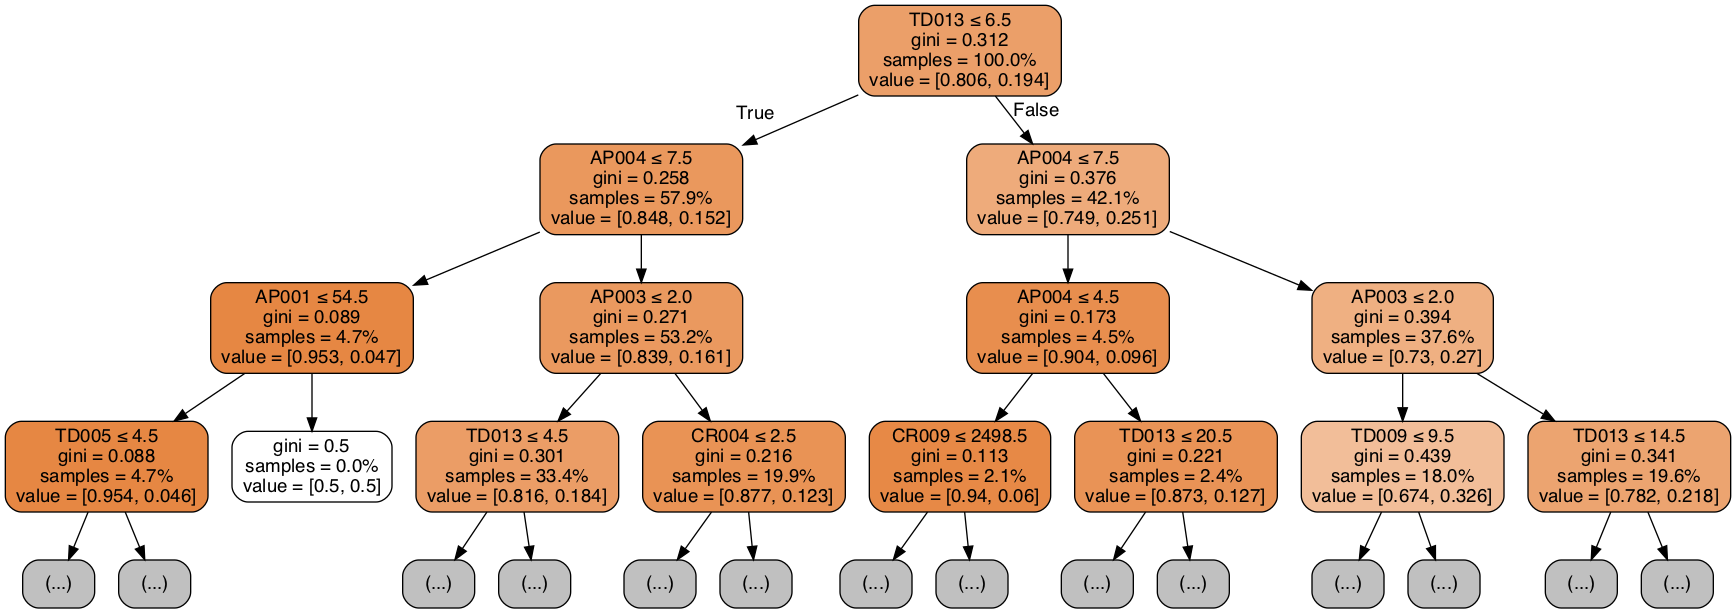

In [441]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,
                proportion=True,
                filled=True, 
                rounded=True,
                feature_names = features,
                max_depth = 3,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph
Image(graph.create_png())

In [442]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

eda = importances.iloc[0:15, :]

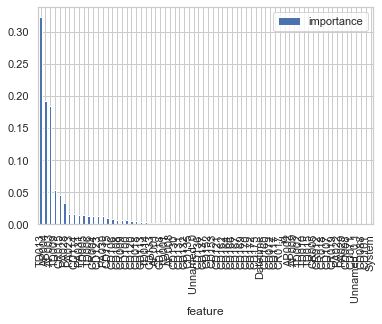

In [443]:
importances.plot.bar(x='feature')

# Feature EDA

In [444]:
# it turns out that the two categorical variables are useless
# the third categorical variable is negelcted.
importances[importances['feature'].isin(['Datetime','System'])]

,feature,importance
68,Datetime,0.0
69,System,0.0


In [445]:
eda.rename(columns={'feature':'Var'},inplace=True)
eda.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Var,importance
15,TD013,0.323
6,AP004,0.192
5,AP003,0.184
13,TD009,0.053
22,CR015,0.046


In [446]:
#imported the "variables" Excel file
variables = pd.read_excel("/Users/aston/Desktop/CU2020Summer/M2/HW2/Variables_Dictionary_2019 copy.xlsx",header=3,index_col=1)
variables.head()

,Unnamed: 0,Var,dtypes,description,Var Category
NO.,,,,,
1,NaN,AP001,Numeric,YR_AGE,Application
2,NaN,AP002,Numeric,CODE_GENDER,Application
3,NaN,AP003,Numeric,CODE_EDUCATION,Application
4,NaN,AP004,Numeric,LOAN_TERM,Application
5,NaN,AP005,Datetime,DATE_APPLIED,Application


In [447]:
innerjoin = pd.merge(eda,  
                      variables,  
                      on ='Var',  
                      how ='inner') 
innerjoin.drop("Unnamed: 0", axis=1)
innerjoin.head()

,Var,importance,Unnamed: 0,dtypes,description,Var Category
0,TD013,0.323,NaN,Numeric,TD_CNT_QUERY_LAST_6MON_P2P,Credit Center
1,AP004,0.192,NaN,Numeric,LOAN_TERM,Application
2,AP003,0.184,NaN,Numeric,CODE_EDUCATION,Application
3,TD009,0.053,NaN,Numeric,TD_CNT_QUERY_LAST_3MON_P2P,Credit Center
4,CR015,0.046,NaN,Numeric,MONTH_CREDIT_CARD_MOB_MAX,Credit Bureau


### Try to see if there is any muticolinearity
Although there are some levels of correlations between the variables in the middle and toward the end, they are good variables. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


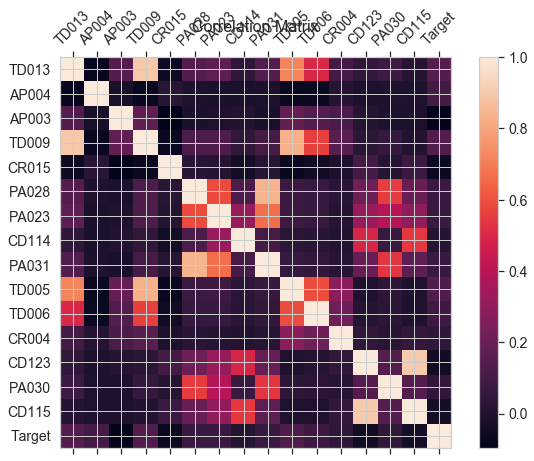

In [448]:
edalist = innerjoin['Var'].tolist()
edacor = data[edalist]
edacor['Target']=data['target']
# it seems like the remaining variables are more correlated to nearby variables 
# if they are in the bottom rows of the data frame
# they should be good to use
f = plt.figure(figsize=(10, 7))
plt.matshow(edacor.corr(), fignum=f.number)
plt.xticks(range(edacor.shape[1]), edacor.columns, fontsize=14, rotation=45)
plt.yticks(range(edacor.shape[1]), edacor.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# F1: TD013 TD_CNT_QUERY_LAST_6MON_P2P
### Assumption: more P2P queries, easier to default


In [449]:
data1 = data[['Unnamed: 0','target','TD013']]
data1.head()

,Unnamed: 0,target,TD013
0,0,1,14
1,1,0,3
2,2,0,9
3,3,0,1
4,4,0,2


In [450]:
data1['target'].corr(data1['TD013'])

0.14410281456916602

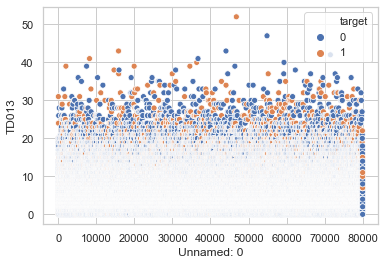

In [451]:
ax = sns.scatterplot(x="Unnamed: 0", y="TD013",
                     hue="target", data=data1)

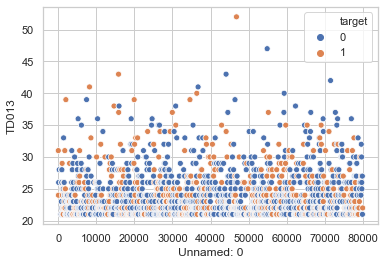

In [452]:
# it is hard to see, so manipulate the data for queries over 20
data11 = data1[data1['TD013']>20]
ax = sns.scatterplot(x="Unnamed: 0", y="TD013",
                     hue="target", data=data11)

In [453]:
data1[['target','TD013']].groupby('target').describe()

TD013                                               
          count      mean       std  min  25%  50%   75%   max
target                                                        
0       64226.0  6.450207  4.926425  0.0  3.0  5.0   9.0  47.0
1       15393.0  8.322094  5.659490  0.0  4.0  7.0  11.0  52.0

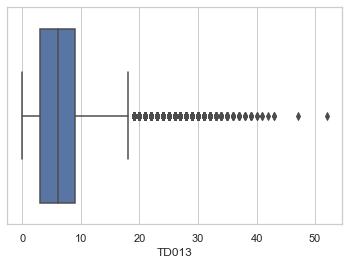

In [454]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data1['TD013'])

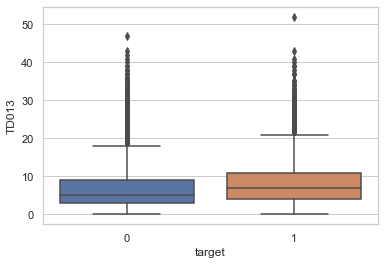

In [455]:
sns.set(style="whitegrid")
ax = sns.boxplot(y='TD013', x='target', data= data1)

In [456]:
# count the number of outliers based on their target(loan_default) variable
data1[data1['TD013']>20].groupby('target').count()

,Unnamed: 0,TD013
target,,
0,1086,1086
1,584,584


### Insight:  
### There is no special correlation, their correlation is only 0.144. Cannot tell by graph either. There are many outliers above 20 queries.
### The mean is slightly higher for those loans that default. 
### Those loans that did not default have 1086 outliers(>20 queries), and default loans have 584 outliers. This follow the proportion of default and nondefault of the bigger dataset.

# F2: AP004 Loan term

In [457]:
data2 = data[['Unnamed: 0','AP004','target']]
print(data2.shape)
print(data2.describe())

(79619, 3)
         Unnamed: 0         AP004        target
count  79619.000000  79619.000000  79619.000000
mean   39998.593288     11.235145      0.193333
std    23090.972519      2.213088      0.394915
min        0.000000      3.000000      0.000000
25%    20005.500000     12.000000      0.000000
50%    39997.000000     12.000000      0.000000
75%    59999.500000     12.000000      0.000000
max    79999.000000     12.000000      1.000000


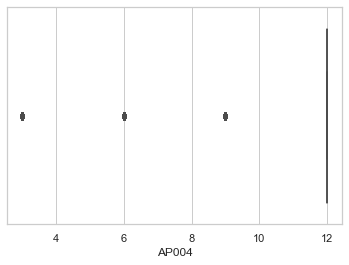

In [458]:
ax = sns.boxplot(x=data2['AP004'])

In [459]:
data2df1 = data2[data2['AP004']<12].groupby('target',as_index=False).count()
data2df1['Percentage'] = data2df1['AP004']/data2df1['Unnamed: 0'].sum()
data2df1['Category'] = (['<12','<12'])
data2df1.reset_index()
data2df2 = data2[data2['AP004']==12].groupby('target',as_index=False).count()
data2df2['Percentage'] = data2df2['AP004']/data2df2['Unnamed: 0'].sum()
data2df2['Category'] = (['=12','=12'])
data2df2.reset_index()
data2df = pd.concat([data2df1, data2df2])
data2df

,target,Unnamed: 0,AP004,Percentage,Category
0,0,8654,8654,0.901928,<12
1,1,941,941,0.098072,<12
0,0,55572,55572,0.793614,=12
1,1,14452,14452,0.206386,=12


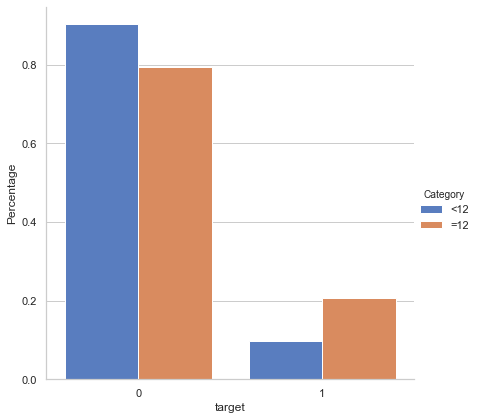

In [460]:
g = sns.catplot(x="target", y="Percentage", hue="Category", data=data2df,
                height=6, kind="bar", palette="muted")

## Insight
### Most of the laon terms are 12, with 9595 loans that are <12. Most of these outliers are non default loans.
### Shorter term loans have lower proportion of default loans. 

# F3 AP003 Code_education
## I am going to calcuate and visualize basic parametric information, and see the relation of education to default

In [461]:
data3 = data[['Unnamed: 0', 'AP003', 'target']]
data3[data3['AP003']<=3].count()/data3.count()

Unnamed: 0    0.861227
AP003         0.861227
target        0.861227
dtype: float64

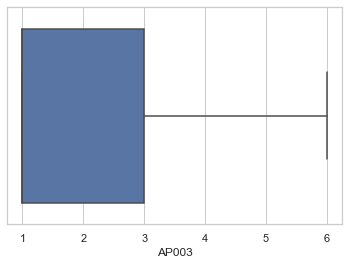

In [462]:
ax = sns.boxplot(x=data3['AP003'])

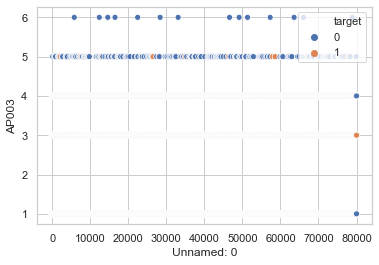

In [463]:
ax = sns.scatterplot(x="Unnamed: 0", y="AP003",
                     hue="target", data=data3)

In [464]:
data3df = data3.groupby(['AP003','target']).count()
data3df['percentage'] = data3df.groupby(level=[0]).apply(lambda g: g / g.sum())['Unnamed: 0']
data3df

Unnamed: 0  percentage
AP003 target                        
1     0            34929    0.779265
      1             9894    0.220735
3     0            19619    0.826168
      1             4128    0.173832
4     0             9446    0.874306
      1             1358    0.125694
5     0              218    0.943723
      1               13    0.056277
6     0               14    1.000000

## Insgiht:
### Most people have between 1 to 3 level of education, which is about 86%
### As education gets higher and higher, the percentage that default decreases from 22% to 0%

# F4:	TD009 TD_CNT_QUERY_LAST_3MON_P2P
### This would be similar to the first feature, but the time period is shorter

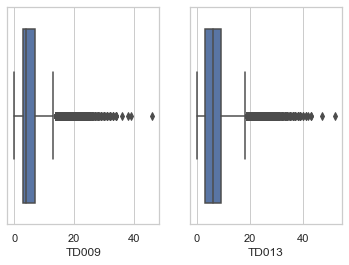

In [465]:
fig, axs = plt.subplots(ncols=2)
sns.set(style="whitegrid")
ax1 = sns.boxplot(x=data['TD009'],ax=axs[0])
sns.set(style="whitegrid")
ax2 = sns.boxplot(x=data['TD013'],ax=axs[1])


In [466]:
data[['TD009','TD013']].describe()

,TD009,TD013
count,79619.000000,79619.000000
mean,5.413356,6.812105
std,4.025102,5.129917
min,0.000000,0.000000
25%,3.000000,3.000000
50%,4.000000,6.000000
75%,7.000000,9.000000
max,46.000000,52.000000


In [467]:
# The only one person who called 46 times had defaulted.
data[data['TD009']>40][['TD009','TD013','target']]

,TD009,TD013,target
46797,46,52,1


In [468]:
# However, if the constraint was relaxed, there was not so much default.
data[data['TD009']>35][['TD009','TD013','target']]

,TD009,TD013,target
36721,36,41,0
44069,38,43,0
46797,46,52,1
54860,39,47,0


In [469]:
# did not see anything out of the ordinary
data4 =data[data['Unnamed: 0'].isin(['36721','44069','46797','54860'])]
data4

,Unnamed: 0,Unnamed: 0.1,id,AP001,AP002,AP003,AP004,AP007,AP008,AP009,...,CD164,CD166,CD167,CD169,CD170,CD172,CD173,target,Datetime,System
36721,36721,36722,36722,26,1,3,12,5,2,0,...,59.0,1351.0,1351.0,2127.0,2041.0,3726.0,3640.0,0,0.885193,2
44069,44069,44070,44070,31,1,3,12,3,3,1,...,12.0,212.0,212.0,448.0,448.0,463.0,463.0,0,0.595518,4
46797,46797,46798,46798,25,2,3,12,5,5,1,...,10.0,425.0,425.0,3770.0,642.0,4781.0,642.0,1,0.711375,2
54860,54860,54861,54861,32,1,3,12,2,2,1,...,11.0,925.0,797.0,1165.0,930.0,1165.0,930.0,0,0.638989,2


## Insight: 
### Since the time frame is smaller, the first quartile is the same, and third quartile is smaller than F1. There is less variance in the dataset.

# F5 CR015 MONTH_CREDIT_CARD_MOB_MAX	
### Compare this variable base on 'target'

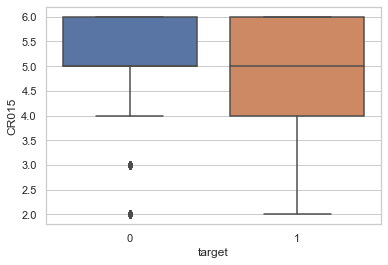

In [470]:
data5 = data[['Unnamed: 0','CR015','target']]
sns.set(style="whitegrid")
ax = sns.boxplot(y='CR015', x='target', data= data5)

In [471]:
print(data5[(data5['CR015']<3.5)&(data5['target']==0)].count())
print(data5[(data5['CR015']<3.5)&(data5['target']==1)].count())


Unnamed: 0    8638
CR015         8638
target        8638
dtype: int64
Unnamed: 0    2577
CR015         2577
target        2577
dtype: int64


## Insight:
### Although there is a greater number of people who have a credit card MOB score under 3.5, they represent the outliers in the nondefault category. Whereas,  this same group will be included in the interquartile range in the defaulted category.

# F6: PA028 AVG_LEN_COLLECTION_OR_HIGH_RISK_CALLS

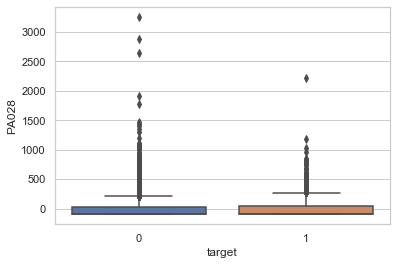

In [472]:
data6 = data[['Unnamed: 0','PA028','target']]
ax = sns.boxplot(y='PA028', x='target', data= data6)

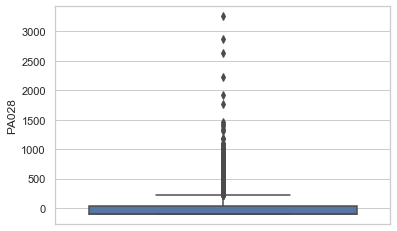

In [473]:
ax = sns.boxplot(y='PA028', data= data6)

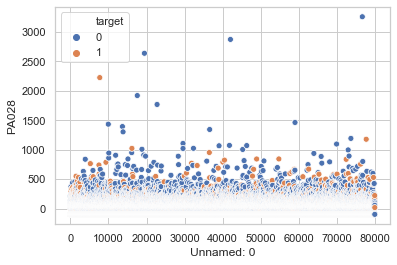

In [474]:
ax = sns.scatterplot(x="Unnamed: 0", y="PA028",
                     hue="target", data=data6)

In [475]:
pacorr = data[['PA028','PA023','PA031','PA030']]
pacorr.corr()

,PA028,PA023,PA031,PA030
PA028,1.000000,0.587788,0.845373,0.556328
PA023,0.587788,1.000000,0.668842,0.396589
PA031,0.845373,0.668842,1.000000,0.540937
PA030,0.556328,0.396589,0.540937,1.000000


### Insight: there is not much correlation of this high-risk-call with default. As such, it has low variable importance of < 3%. However, all the calls that start with "PA" have quite high correlation.

# F7: PA023 DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL	

In [476]:
data['PA023'].describe()

count    79619.000000
mean        14.828822
std         37.009374
min        -99.000000
25%         -1.000000
50%         -1.000000
75%         14.000000
max        448.000000
Name: PA023, dtype: float64

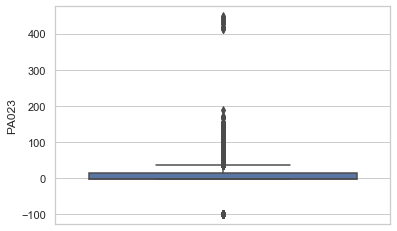

In [477]:
ax = sns.boxplot(y='PA023', data= data)

In [478]:
data[data['PA023'] > 0].count()

Unnamed: 0      21964
Unnamed: 0.1    21964
id              21964
AP001           21964
AP002           21964
                ...  
CD172           21964
CD173           21964
target          21964
Datetime        21964
System          21964
Length: 72, dtype: int64

In [479]:
data[data['PA023'] < 0].count()

Unnamed: 0      57538
Unnamed: 0.1    57538
id              57538
AP001           57538
AP002           57538
                ...  
CD172           57538
CD173           57538
target          57538
Datetime        57538
System          57538
Length: 72, dtype: int64

In [480]:
data[data['PA023'] < 0].groupby('target').count()['PA023']

target
0    47502
1    10036
Name: PA023, dtype: int64

### Insight: this variable has negative numbers, and there are 57k of them. Negative number means there are collection calls before the loan applications, which means these loan applicants have had collection calls in the past. However, most of the loans did not default, maybe this variable is wrong.

# F8 CD114	CNT_ABNORMAL_HOURS_CALL_DAYS_LAST_3MON

count    79619.000000
mean         1.176352
std         23.311023
min        -99.000000
25%          0.000000
50%          2.000000
75%          6.000000
max         90.000000
Name: CD114, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


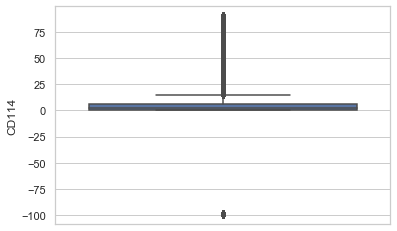

In [481]:
print(data['CD114'].describe())
ax = sns.boxplot(y='CD114', data= data)
print(ax)

In [482]:
data[data['CD114']<0].count()

Unnamed: 0      3307
Unnamed: 0.1    3307
id              3307
AP001           3307
AP002           3307
                ... 
CD172           3307
CD173           3307
target          3307
Datetime        3307
System          3307
Length: 72, dtype: int64

### Insight: the data quality in here is better than the previous one. However, negative numbers here do not make sense.

# F9 PA031 AVG_LEN_COLLECTION_CALLS	

count    79619.000000
mean       -48.404044
std         96.313406
min        -99.000000
25%        -98.000000
50%        -98.000000
75%         18.000000
max       4739.000000
Name: PA031, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


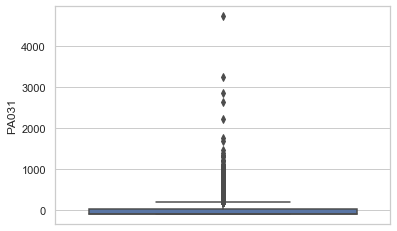

In [483]:
print(data['PA031'].describe())
ax = sns.boxplot(y='PA031', data= data)
print(ax)

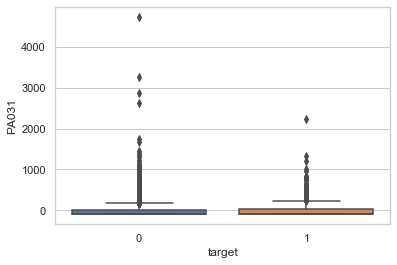

In [484]:
x = sns.boxplot(y='PA031', x='target', data= data)

### Insight: this data is of good quality. There are no negative numbers, however, the length of collection calls are shorter for default loans.

# F10 TD005	TD_CNT_QUERY_LAST_1MON_P2P

count    79619.000000
mean         3.598124
std          2.800711
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         24.000000
Name: TD005, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


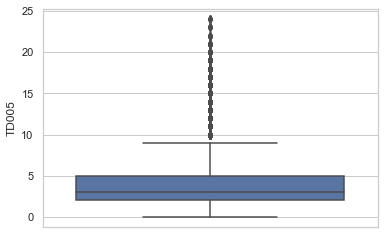

In [485]:
print(data['TD005'].describe())
ax = sns.boxplot(y='TD005', data= data)
print(ax)

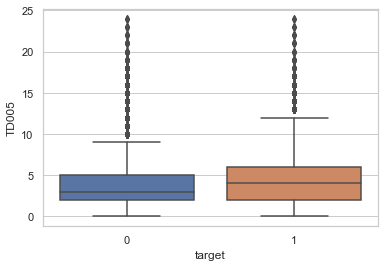

In [486]:
x = sns.boxplot(y='TD005', x='target', data= data)

### Insight: for those loans that default, they have greater number of 1Month P2P query and the thrid quartile is greater than normal loans. 

# F11 CR004 CNT_QUERY_TIME_LAST_1MON

count    79619.000000
mean         2.503799
std          1.118063
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          4.000000
Name: CR004, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


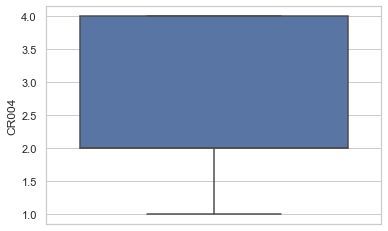

In [487]:
print(data['CR004'].describe())
ax = sns.boxplot(y='CR004', data= data)
print(ax)

### Insight: people who have outstanding P2P loans would normally have multiple credit query in the last 1month.

# F12 TD006 TD_CNT_QUERY_LAST_1MON_SMALL_LOAN

count    79619.000000
mean         1.347693
std          1.414195
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         21.000000
Name: TD006, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


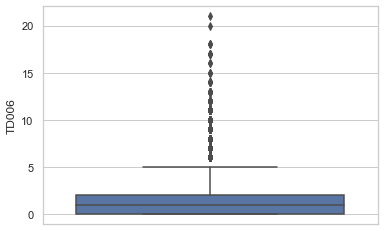

In [488]:
print(data['TD006'].describe())
ax = sns.boxplot(y='TD006', data= data)
print(ax)

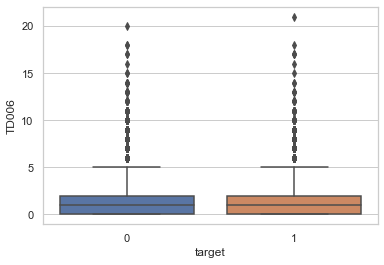

In [489]:
x = sns.boxplot(y='TD006', x='target', data= data)

In [490]:
data.groupby('target').mean()['TD006']

target
0    1.287376
1    1.599363
Name: TD006, dtype: float64

### Insight: the distribution looks normal, but the mean of those who defaulted would have more small loan queries. 

# F13  CD123 CNT_DISTINCT_OUTBOUND_CALLS_LAST_3MON

count    79619.000000
mean       113.074379
std         86.765922
min        -99.000000
25%         65.000000
50%        103.000000
75%        154.000000
max       1199.000000
Name: CD123, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


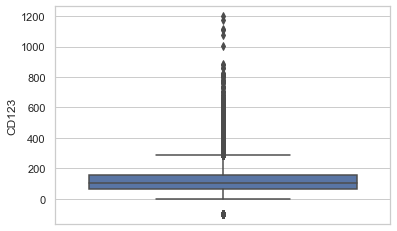

In [491]:
print(data['CD123'].describe())
ax = sns.boxplot(y='CD123', data= data)
print(ax)

In [492]:
data.groupby(['target','AP003']).mean()['TD006']

target  AP003
0       1        1.080277
        3        1.539987
        4        1.518209
        5        1.733945
        6        1.285714
1       1        1.397817
        3        1.976017
        4        1.918262
        5        2.076923
Name: TD006, dtype: float64

### Insight: for those that default, there is nobody with the education code of 6. At every education code, the default loans make more distinct outbound calls. My assumptino is that they would call more people to see if they can raise money. 

# F14 PA030 AVG_LEN_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS

count    79619.000000
mean       -74.438095
std         74.146246
min        -99.000000
25%        -98.000000
50%        -98.000000
75%        -98.000000
max       3257.000000
Name: PA030, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


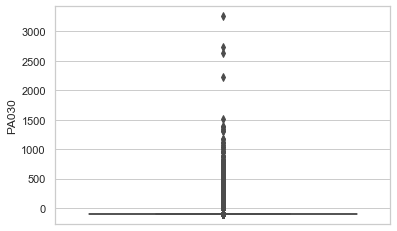

In [493]:
print(data['PA030'].describe())
ax = sns.boxplot(y='PA030', data= data)
print(ax)

In [494]:
data[data['PA030']<0].count()

Unnamed: 0      69420
Unnamed: 0.1    69420
id              69420
AP001           69420
AP002           69420
                ...  
CD172           69420
CD173           69420
target          69420
Datetime        69420
System          69420
Length: 72, dtype: int64

### Insight: this variables have so many negatives numbers, there should be red flag raised. 

# F15 CD115	 CNT_DISTINCT_CALLS_LAST_1MON	

count    79619.00000
mean        68.37697
std         60.57446
min        -99.00000
25%         38.00000
50%         62.00000
75%         95.00000
max        979.00000
Name: CD115, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


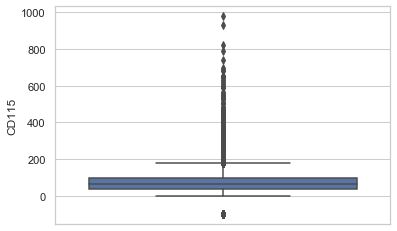

In [495]:
print(data['CD115'].describe())
ax = sns.boxplot(y='CD115', data= data)
print(ax)

In [496]:
data[data['CD115']<0].count()

Unnamed: 0      3307
Unnamed: 0.1    3307
id              3307
AP001           3307
AP002           3307
                ... 
CD172           3307
CD173           3307
target          3307
Datetime        3307
System          3307
Length: 72, dtype: int64

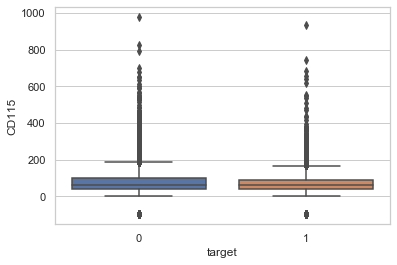

In [497]:
x = sns.boxplot(y='CD115', x='target', data= data)

In [498]:
data.groupby('target').mean()['CD115']

target
0    69.374599
1    64.214448
Name: CD115, dtype: float64

### Insight: for those who defualt, they will have less distinct calls in the last month. Maybe, they don't want people to know, unless they really have to. 

In [499]:
innerjoin[['Var','importance','description']]

,Var,importance,description
0,TD013,0.323,TD_CNT_QUERY_LAST_6MON_P2P
1,AP004,0.192,LOAN_TERM
2,AP003,0.184,CODE_EDUCATION
3,TD009,0.053,TD_CNT_QUERY_LAST_3MON_P2P
4,CR015,0.046,MONTH_CREDIT_CARD_MOB_MAX
5,PA028,0.033,AVG_LEN_COLLECTION_OR_HIGH_RISK_CALLS
6,PA023,0.016,DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL
7,CD114,0.015,CNT_ABNORMAL_HOURS_CALL_DAYS_LAST_3MON
8,PA031,0.014,AVG_LEN_COLLECTION_CALLS
9,TD005,0.014,TD_CNT_QUERY_LAST_1MON_P2P


# [Learning objective 4] Predict new observations

In [500]:
predictions = dtree.predict(X_test[0:10])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [501]:
dtree.predict_proba(X_test[0:10])

array([[0.6626232 , 0.3373768 ],
       [0.79261572, 0.20738428],
       [0.6626232 , 0.3373768 ],
       [0.56277056, 0.43722944],
       [0.83355886, 0.16644114],
       [0.84729303, 0.15270697],
       [0.86399401, 0.13600599],
       [0.95268817, 0.04731183],
       [0.71861373, 0.28138627],
       [0.91834841, 0.08165159]])

In [502]:
y_pred = dtree.predict_proba(X_test[0:10])[:,1]
y_pred

array([0.3373768 , 0.20738428, 0.3373768 , 0.43722944, 0.16644114,
       0.15270697, 0.13600599, 0.04731183, 0.28138627, 0.08165159])

In [503]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

predictions = dtree.predict(X_test[features])
print(accuracy_score(Y_test,predictions))

0.8071338859583019


In [504]:
np.count_nonzero(Y_test == 1)

3820

In [505]:
cm = pd.DataFrame(confusion_matrix(Y_test,predictions))
cm.rename(columns={0:'Predicted Low', 1:'Predicted High'},
         index = {0:'Actual Low',1:'Actual High'},inplace=True)
cm

,Predicted Low,Predicted High
Actual Low,15961,124
Actual High,3715,105


In [506]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.6562405707896695

In [507]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 0.00000000e+00, 3.10848617e-04, 7.70904569e-03,
        7.89555486e-03, 8.08206403e-03, 8.51725210e-03, 1.70345042e-02,
        2.03294995e-02, 2.63599627e-02, 3.10848617e-02, 5.58284116e-02,
        7.37332919e-02, 7.40441405e-02, 7.93907367e-02, 8.82188374e-02,
        1.07926640e-01, 1.19738887e-01, 1.83587193e-01, 1.84333230e-01,
        1.86695679e-01, 2.29095431e-01, 2.96922599e-01, 3.06558906e-01,
        3.98507927e-01, 4.05719615e-01, 4.46316444e-01, 4.80509792e-01,
        4.95927883e-01, 5.21355300e-01, 5.94715574e-01, 6.38980417e-01,
        6.39788623e-01, 6.40845508e-01, 6.87161952e-01, 6.89027044e-01,
        7.12589369e-01, 7.28131800e-01, 7.31551135e-01, 7.40379235e-01,
        7.82778987e-01, 7.90425863e-01, 8.33074293e-01, 9.13273236e-01,
        9.29996892e-01, 9.38638483e-01, 9.40441405e-01, 9.44109419e-01,
        9.52191483e-01, 9.72894001e-01, 9.83773702e-01, 9.99689151e-01,
        1.00000000e+00]),
 array([0.00000000e+00, 2.61780105e-04

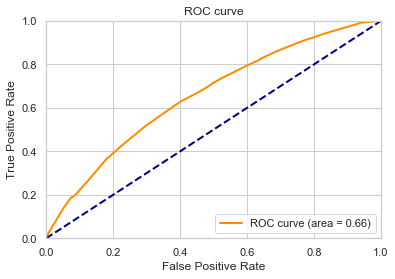

In [508]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

Gains

In [509]:
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = Y_test
df_prep['pred'] =y_pred
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
59188,1,1.0,0
69422,0,0.8,1
26091,0,0.8,2
51316,0,0.8,3
51931,1,0.8,4


In [510]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

8    1991
6    1991
4    1991
2    1991
0    1991
9    1990
7    1990
5    1990
3    1990
1    1990
Name: decile, dtype: int64

In [511]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains.head()

,count,actual
decile,,
0,1991,726
1,1990,560
2,1991,508
3,1990,418
4,1991,362


# Gains table

In [512]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1991,726,1265,1991,726,1265,0.19,0.08,382.0,1.90,11.0,36.46
1,1990,560,1430,3981,1286,2695,0.34,0.17,764.0,1.68,17.0,32.30
2,1991,508,1483,5972,1794,4178,0.47,0.26,1146.0,1.57,21.0,30.04
3,1990,418,1572,7962,2212,5750,0.58,0.36,1528.0,1.45,22.0,27.78
4,1991,362,1629,9953,2574,7379,0.67,0.46,1910.0,1.35,21.0,25.86
5,1990,336,1654,11943,2910,9033,0.76,0.56,2292.0,1.27,20.0,24.37
6,1991,322,1669,13934,3232,10702,0.85,0.67,2674.0,1.21,18.0,23.20
7,1990,251,1739,15924,3483,12441,0.91,0.77,3056.0,1.14,14.0,21.87
8,1991,218,1773,17915,3701,14214,0.97,0.88,3438.0,1.08,9.0,20.66


In [513]:
def gains_table(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = Y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(Y_test,y_pred)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1991,726,1265,1991,726,1265,0.19,0.08,382.0,1.90,11.0,36.46
1,1990,560,1430,3981,1286,2695,0.34,0.17,764.0,1.68,17.0,32.30
2,1991,508,1483,5972,1794,4178,0.47,0.26,1146.0,1.57,21.0,30.04
3,1990,418,1572,7962,2212,5750,0.58,0.36,1528.0,1.45,22.0,27.78
4,1991,362,1629,9953,2574,7379,0.67,0.46,1910.0,1.35,21.0,25.86
5,1990,336,1654,11943,2910,9033,0.76,0.56,2292.0,1.27,20.0,24.37
6,1991,322,1669,13934,3232,10702,0.85,0.67,2674.0,1.21,18.0,23.20
7,1990,251,1739,15924,3483,12441,0.91,0.77,3056.0,1.14,14.0,21.87
8,1991,218,1773,17915,3701,14214,0.97,0.88,3438.0,1.08,9.0,20.66


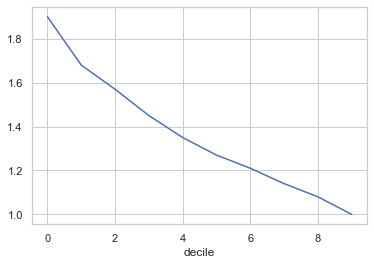

In [514]:
gains['lift'].plot.line()

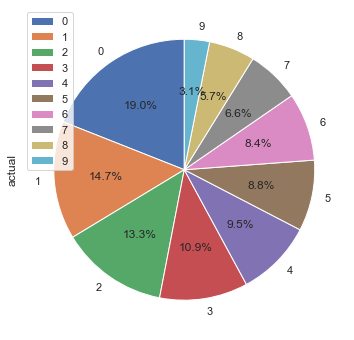

In [515]:
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

# K-S

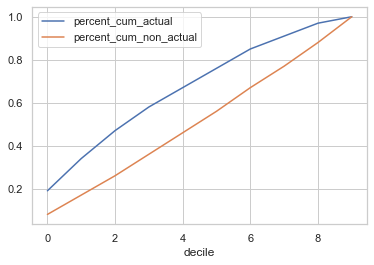

In [516]:
gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()

In [517]:
gains['K_S'].max()

21.999999999999996

# LM regression

In [518]:
eda1 = eda['Var'].tolist()

In [519]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'AP001', 'AP002', 'AP003', 'AP004',
       'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009',
       'TD010', 'TD013', 'TD014', 'TD015', 'CR004', 'CR005', 'CR009', 'CR012',
       'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'PA028', 'PA029',
       'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100',
       'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117',
       'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133',
       'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164',
       'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'target',
       'Datetime', 'System'],
      dtype='object')

In [520]:
lmdata = data[eda1]
lmdata['target'] = data['target']
lmdata.shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(79619, 16)

In [521]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(lmdata))
StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [522]:
from sklearn.linear_model import LogisticRegression
X =  lmdata[eda1]
y = lmdata['target']

In [523]:
clf = LogisticRegression(random_state=0).fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### runs into an error